In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("dream")

In [ ]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue_id', 'dialogue', 'question', 'choice', 'answer'],
        num_rows: 6116
    })
    validation: Dataset({
        features: ['id', 'dialogue_id', 'dialogue', 'question', 'choice', 'answer'],
        num_rows: 2040
    })
    test: Dataset({
        features: ['id', 'dialogue_id', 'dialogue', 'question', 'choice', 'answer'],
        num_rows: 2041
    })
})

In [ ]:
raw_datasets["train"][0]

{'id': 0,
 'dialogue_id': '5-510',
 'dialogue': ['M: I am considering dropping my dancing class. I am not making any progress.',
  "W: If I were you, I stick with it. It's definitely worth time and effort."],
 'question': 'What does the man suggest the woman do?',
 'choice': ['Consult her dancing teacher.',
  'Take a more interesting class.',
  'Continue her dancing class.'],
 'answer': 'Continue her dancing class.'}

In [ ]:
raw_datasets["validation"][0]

{'id': 0,
 'dialogue_id': '14-349',
 'dialogue': ['M: How long have you been teaching in this middle school?',
  "W: For ten years. To be frank, I'm tired of teaching the same textbook for so long though I do enjoy being a teacher. I'm considering trying something new."],
 'question': "What's the woman probably going to do?",
 'choice': ['To teach a different textbook.',
  'To change her job.',
  'To learn a different textbook.'],
 'answer': 'To change her job.'}

In [ ]:
Who = []
What = []
Which= []
When = []
Where = []
Why = []
How = []

In [ ]:
for row in raw_datasets["train"]:
    if row["question"].startswith('Who'):
        Who.append(row["question"])
    elif row["question"].startswith('What'):
        What.append(row["question"])
    elif row["question"].startswith('Which'):
        Which.append(row["question"])
    elif row["question"].startswith('When'):
        When.append(row["question"])
    elif row["question"].startswith('Where'):
        Where.append(row["question"])
    elif row["question"].startswith('Why'):
        Why.append(row["question"])
    elif row["question"].startswith('How'):
        How.append(row["question"])

In [ ]:
print(len(Who),
      len(What),
      len(Which),
      len(When),
      len(Where),
      len(Why),
      len(How))

234 3387 167 261 590 512 609


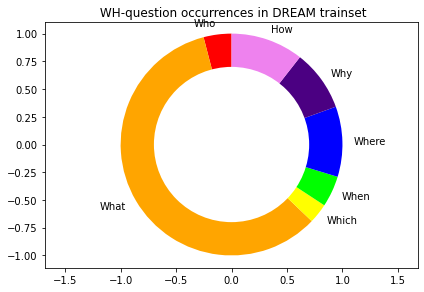

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Who', 'What', 'Which', 'When', 'Where', 'Why', 'How']
sizes = [len(Who), len(What), len(Which), len(When), len(Where), len(Why), len(How)]
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#EE82EE']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, startangle=90, frame = True)
 
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title(' WH-question occurrences in DREAM trainset')
plt.show()


In [ ]:
distribution_dialogue_length = []
distribution_question_length = []
distribution_answer_length = []

In [ ]:
raw_datasets["train"][0]["dialogue"][0][3:]

'I am considering dropping my dancing class. I am not making any progress.'

In [ ]:
# we need word-level length
for row in raw_datasets["train"]:
    one_dialogue = 0
    for sentence in row["dialogue"]:
        one_dialogue += len(sentence[3:].strip().split())
    distribution_dialogue_length.append(one_dialogue)    
    distribution_question_length.append(len(row["question"].strip().split()))
    distribution_answer_length.append(len(row["answer"].split()))

In [ ]:
buckets = {"0-10": 0, "11-20": 0, "21-30": 0, "31-48": 0}

In [ ]:
for row in raw_datasets["train"]:
    turns_per_dialogue = 0
    for _ in range(len(row["dialogue"])):
        turns_per_dialogue += 1
    if 0 <= turns_per_dialogue <= 10:
        buckets["0-10"] += 1
    elif 11 <= turns_per_dialogue <= 20:
        buckets["11-20"] += 1
    elif 21 <= turns_per_dialogue <= 30:
        buckets["21-30"] += 1
    elif 31 <= turns_per_dialogue <= 48:
        buckets["31-48"] += 1

In [ ]:
buckets

{'0-10': 4438, '11-20': 1407, '21-30': 219, '31-48': 52}

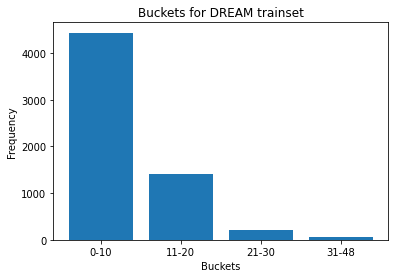

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = buckets
keys = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots()
ax.bar(keys, values)

# Add labels and title
ax.set_title('Buckets for DREAM trainset')
ax.set_xlabel('Buckets')
ax.set_ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
max(distribution_dialogue_length)

985

In [ ]:
min(distribution_dialogue_length)

4

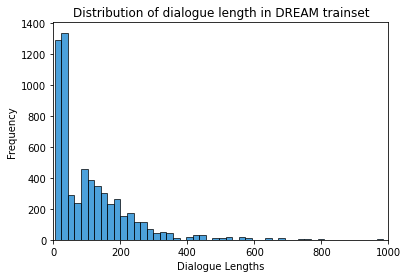

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate histogram
data = distribution_dialogue_length

# Plot the histogram
plt.hist(data, bins=50, color='#007acc', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Dialogue Lengths')
plt.ylabel('Frequency')
plt.title('Distribution of dialogue length in DREAM trainset')

# Limit the x-axis range
plt.xlim(0, 1000)

# Show plot
plt.show()

In [ ]:
max(distribution_question_length)

22

In [ ]:
min(distribution_question_length)

2

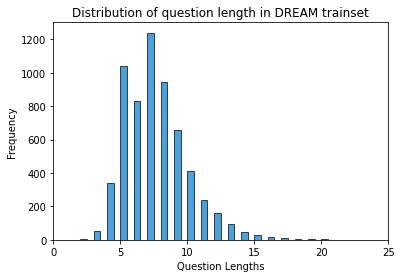

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate histogram
data = distribution_question_length

# Plot the histogram
plt.hist(data, bins=40, color='#007acc', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Question Lengths')
plt.ylabel('Frequency')
plt.title('Distribution of question length in DREAM trainset')

# Limit the axis range
plt.xlim(0, 25)

# Show plot
plt.show()

In [ ]:
max(distribution_answer_length)

20

In [ ]:
min(distribution_answer_length)

1

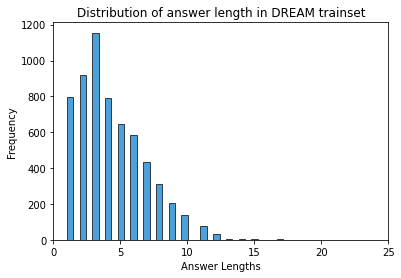

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate histogram
data = distribution_answer_length

# Plot the histogram
plt.hist(data, bins=40, color='#007acc', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Answer Lengths')
plt.ylabel('Frequency')
plt.title('Distribution of answer length in DREAM trainset')

# Limit the axis range
plt.xlim(0, 25)

# Show plot
plt.show()